In [2]:
import pandas as pd
import numpy as np
import os
from os.path import splitext, basename
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reads in the compiled dataset
dfm=pd.read_excel(r'../MeltInclusionCompilation_april23.xlsx')

In [10]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


In [4]:
# Getting measured H2O, Raman CO2 contents
Aster=dfm.loc[dfm['reference']=="Aster_2016"]
Aster['Sat_P_Pref']=Aster['satp_meash2oramanco2']/1000
Aster['Study']="Aster"
Aster['Comp']="Basalt"

# Measured H2O and CO2 for Quin
Quinn=dfm.loc[dfm['reference']=="Quinn_2014"]
Quinn['Sat_P_Pref']=Quinn['satp_meash2omeasco2']/1000
Quinn['Study']="Quinn"
Quinn['Comp']="Rhyodacite"

# Meas H2O and CO2 as theoretical CO2 reconstructions are unreliable
Wal2016=dfm.loc[dfm['reference']=="Walowski_2016"]
Wal2016['Sat_P_Pref']=Wal2016['satp_meash2omeasco2']/1000
Wal2016['Study']="Wal16"
Wal2016['Comp']="Basalt"

# Meas H2O and CO2 as theoretical CO2 reconstructions are unreliable

Wal2019=dfm.loc[dfm['reference']=="Walowski_et_al_2019"]
Wal2019['Sat_P_Pref']=Wal2019['satp_meash2omeasco2']/1000
Wal2019['Study']="Wal19"
Wal2019['Comp']="Basalt"

MI_Combo=pd.concat([Aster, Wal2016, Wal2019, Quinn], axis=0)

In [5]:
len(MI_Combo)

205

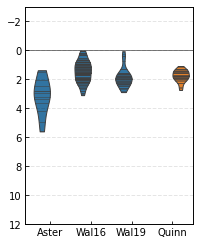

In [14]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(3,4), sharey=True)
# The ax1 axis is pressure, ax2 is depth. 
ax2 = ax1.twinx()

# Determins the plotting order
volc_order=["Aster", "Wal16", "Wal19", "Quinn"]
sns.violinplot(x="Study", y="Sat_P_Pref",  cut=0, inner="stick", linewidth=1,
               hue='Comp',
            data=MI_Combo,  ax=ax1,  order=volc_order, stick=True)
##

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([-0.6, 3.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([ 0, 1, 2, 3])
#ax1.set_xticklabels(['Aster', 'W2016', 'W2019', ''], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax1.get_legend().remove()   
ax2.set_yticks([])
fig.savefig('Lassen_MIs.png', dpi=200, bbox_inches="tight")